In [37]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import scipy.stats as stats


In [39]:
dataPath = './wines.csv'

data = pd.read_csv(dataPath)

data = data[data['Year'] != 'N.V.']
data['Year'] = data['Year'].astype(np.float)

print(data.shape)
data.head()


(4583, 14)


C:\Users\bogya\AppData\Local\Temp/ipykernel_8976/400070270.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = data['Year'].astype(np.float)


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001.0,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015.0,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013.0,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006.0,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007.0,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351


In [40]:
feature = ['Year', 'VintageRating', 'VintageRatingCount', 'WineRating', 'WineRatingCount',
           'VintagePrice', 'WinePrice', 'VintageRatingPriceRatio', 'WineRatingPriceRatio']

data = data[feature]
data = data.dropna()

x_cols = ['Year', 'VintageRating', 'VintageRatingCount',
          'WineRatingCount', 'VintageRatingPriceRatio', 'WineRatingPriceRatio']
y_cols = ['WineRating', 'VintagePrice',	'WinePrice']

X = data[x_cols]
Y = data[y_cols]

data['VintagePrice'] = np.log(data['VintagePrice'])
data['WinePrice'] = np.log(data['WinePrice'])
data['WineRatingCount'] = np.log(data['WineRatingCount'])

print(data.shape)
data.head()


(4583, 9)


,Year,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,2001.0,4.9,25,4.7,6.626718,6.692803,6.692803,0.006075,0.005827
1,2015.0,4.8,46,4.6,7.082549,6.522093,6.522093,0.007059,0.006765
2,2013.0,4.8,28,4.6,6.784457,6.104793,6.104793,0.010714,0.010268
3,2006.0,4.8,31,4.5,6.025866,5.103974,5.103974,0.029148,0.027327
4,2007.0,4.8,35,4.7,6.118097,8.154316,8.154316,0.001380,0.001351


# Step 2

In [41]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.7)

# Accept Reject Sampling

In [42]:
def normal_pdf(x, mu_, sigma_):
    return (1 / (np.sqrt(2*np.pi)*sigma_)) * np.exp(-0.5 * ((x-mu_)/sigma_)**2)


def lognorm_pdf(x, mu, sigma):
    exp = np.exp(-(np.log(x) - mu)**2 / (2 * sigma ** 2))
    frac = (x * sigma * (2 * np.pi) ** 0.5)
    return (exp/frac)


def expon_pdf(x, lam):
    return lam * np.exp(-lam * x)


# Approximating [WineRatingPriceRatio] using Accept Reject Sampling

samplesWineRating Collected: 1679
Effection: 0.1679


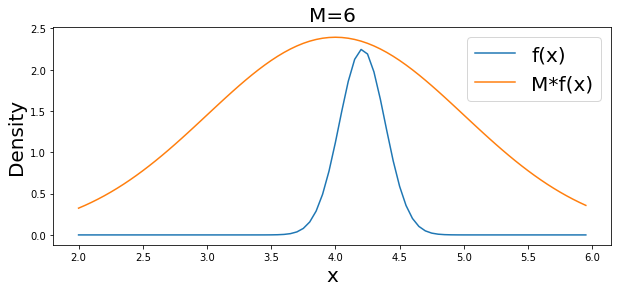

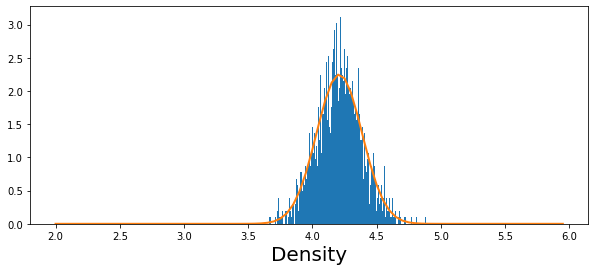

In [43]:
mu = 4.209411587616665
sigma = 0.17738774911959015

upper_params = 4, 1

M = 6
x_vals = np.arange(2, 6, 0.05)
f_vals = [normal_pdf(x, mu, sigma) for x in x_vals]
f2_vals = normal_pdf(x_vals, *upper_params)

plt.figure(figsize=(10, 4))

plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, M*f2_vals, label='M*f(x)')

plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)

plt.title(f'M={M}', fontsize=20)

samplesWineRating = []

N = int(1e4)
for _ in range(N):
    candidate = np.random.normal(*upper_params)

    prob_accept = normal_pdf(candidate, mu, sigma) / \
        (M*normal_pdf(candidate, *upper_params))

    if np.random.random() < prob_accept:
        samplesWineRating.append(candidate)
        pass
    
    continue

plt.figure(figsize=(10, 4))

plt.hist(samplesWineRating, bins=200, density=True)
plt.plot(x_vals, [f for f in f_vals], linewidth=2)

plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)

print(f'samplesWineRating Collected: {len(samplesWineRating)}')
print(f'Effection: {len(samplesWineRating)/N}')


# Approximating [WineRatingCount] using Accept Reject Sampling

samplesWineRatingCount Collected: 3364
Effection: 0.3364


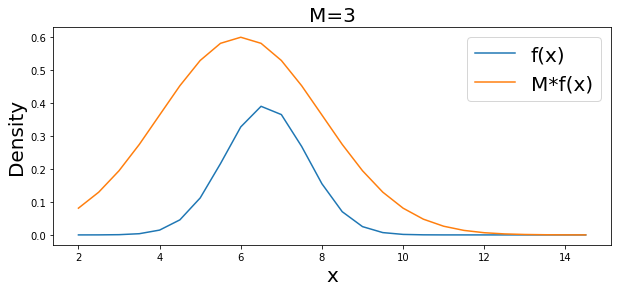

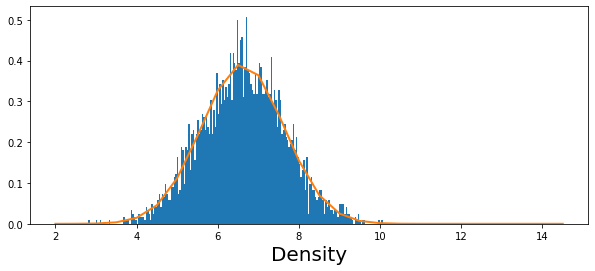

In [44]:
mu = 6.6121623937068765
sigma = 1.0184543764286984

upper_params = 6, 2

M = 3
x_vals = np.arange(2, 15, 0.5)
f_vals = [normal_pdf(x, mu, sigma) for x in x_vals]
f2_vals = normal_pdf(x_vals, *upper_params)

plt.figure(figsize=(10, 4))

plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, M*f2_vals, label='M*f(x)')

plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)

plt.title(f'M={M}', fontsize=20)

samplesWineRatingCount = []

N = int(1e4)
for _ in range(N):
    candidate = np.random.normal(*upper_params)

    prob_accept = normal_pdf(candidate, mu, sigma) / \
        (M*normal_pdf(candidate, *upper_params))

    if np.random.random() < prob_accept:
        samplesWineRatingCount.append(candidate)
        pass

    continue

plt.figure(figsize=(10, 4))

plt.hist(samplesWineRatingCount, bins=200, density=True)
plt.plot(x_vals, [f for f in f_vals], linewidth=2)

plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)

print(f'samplesWineRatingCount Collected: {len(samplesWineRatingCount)}')
print(f'Effection: {len(samplesWineRatingCount)/N}')


# Approximating [WinePrice] using Accept Reject Sampling

samplesWinePrice Collected: 24910
Effection: 0.2491


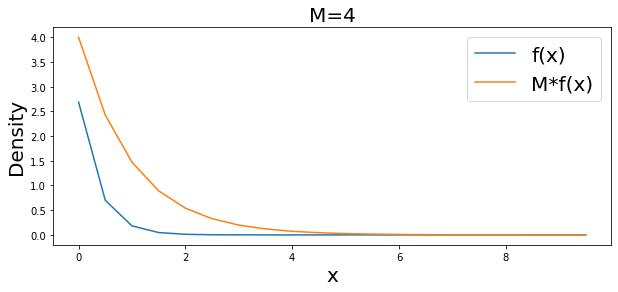

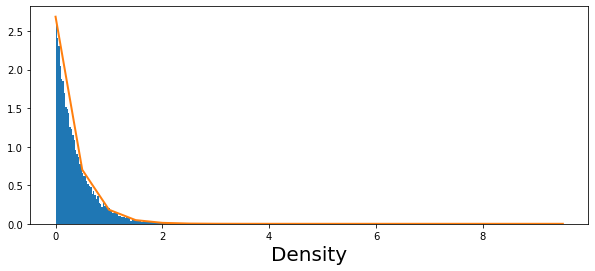

In [45]:
lam = 2.686864374340659

upper_params = 1

M = 4
x_vals = np.arange(0, 10, 0.5)
f_vals = [expon_pdf(x, lam) for x in x_vals]
f2_vals = expon_pdf(x_vals, upper_params)

plt.figure(figsize=(10, 4))

plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, M*f2_vals, label='M*f(x)')

plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(fontsize=20)

plt.title(f'M={M}', fontsize=20)

samplesWinePrice = []

N = int(1e5)
for _ in range(N):
    candidate = np.random.exponential(upper_params)

    prob_accept = expon_pdf(candidate, lam) / \
        (M*expon_pdf(candidate, upper_params))

    if np.random.random() < prob_accept:
        samplesWinePrice.append(candidate)
        pass

    continue

plt.figure(figsize=(10, 4))

plt.hist(samplesWinePrice, bins=200, density=True)
plt.plot(x_vals, [f for f in f_vals], linewidth=2)

plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)

print(f'samplesWinePrice Collected: {len(samplesWinePrice)}')
print(f'Effection: {len(samplesWinePrice)/N}')


# Inverse Transformation

In [46]:
def inverse_transform_sampling(n, rand, dist, param, args=0):
    gen = rand(size=n)
    rv = dist(*param)
    return rv.ppf(gen) + args


# Approximating [WineRatingPriceRatio] distribution using Inverse Transform

d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


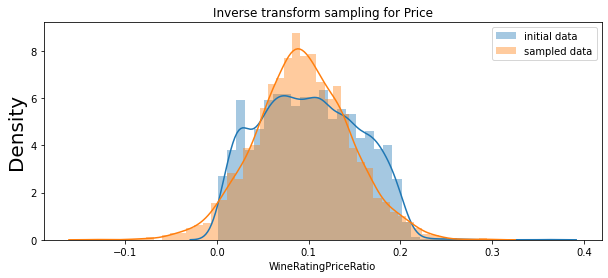

In [47]:
paramsWineRatingPriceRatio = stats.norm.fit(data['WineRatingPriceRatio'])
sampledWineRatingPriceRatio_ = inverse_transform_sampling(
    int(1e4), np.random.normal, stats.norm, paramsWineRatingPriceRatio)

plt.figure(figsize=(10, 4))

sns.distplot(data['WineRatingPriceRatio'], kde=True, label='initial data')
sns.distplot(sampledWineRatingPriceRatio_, kde=True,
             norm_hist=True, label='sampled data')

plt.ylabel('Density', fontsize=20)
plt.title('Inverse transform sampling for WineRatingPriceRatio')
plt.legend()


# Approximating [WineRatingCount] distribution using Inverse Transform

d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


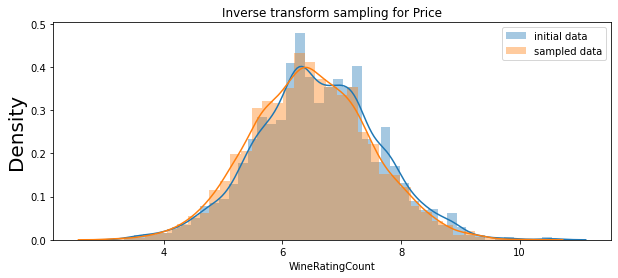

In [48]:
paramsWineRatingCount = stats.norm.fit(data['WineRatingCount'])
sampledWineRatingCount_ = inverse_transform_sampling(
    int(1e4), np.random.normal, stats.norm, paramsWineRatingCount)

plt.figure(figsize=(10, 4))

sns.distplot(data['WineRatingCount'], kde=True, label='initial data')
sns.distplot(sampledWineRatingCount_, kde=True,
             norm_hist=True, label='sampled data')

plt.ylabel('Density', fontsize=20)
plt.title('Inverse transform sampling for WineRatingCount')
plt.legend()


# Approximating [WinePrice] distribution using Inverse Transform

d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


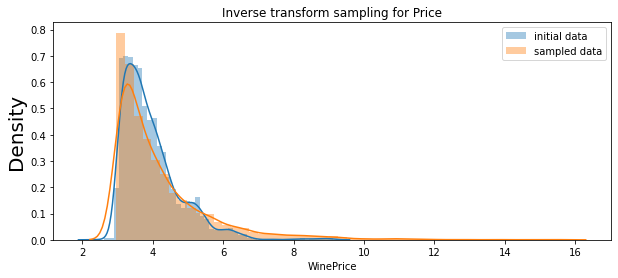

In [49]:
paramsWinePrice = stats.expon.fit(data['WinePrice'])
sampledWinePrice_ = inverse_transform_sampling(
    int(1e4), np.random.exponential, stats.expon, paramsWinePrice, 0.6)

plt.figure(figsize=(10, 4))

sns.distplot(data['WinePrice'], kde=True, label='initial data')
sns.distplot(sampledWinePrice_, kde=True, norm_hist=True, label='sampled data')

plt.ylabel('Density', fontsize=20)
plt.title('Inverse transform sampling for WinePrice')
plt.legend()


# Step 3

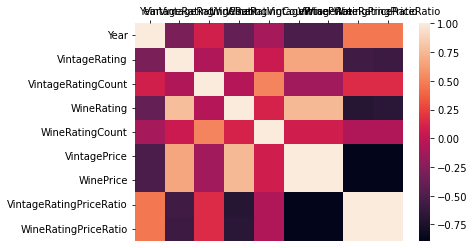

In [50]:
corrmat = data.corr()
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()


In [51]:
def tmp(x, y, xlabel, ylabel):
    print('='*50)
    print(f'{xlabel} and {ylabel}')
    res = scipy.stats.pearsonr(x, y)
    print(f'coef.corr = {res[0]}, pval = {res[1]}')
    print('='*50, end='\n\n')
    pass


for i in range(0, len(feature)):
    for j in range(0, len(feature)):
        if (i == j):
            continue
        tmp(data[feature[i]].values, data[feature[j]].values, feature[i], feature[j])
        continue
    continue


Year and VintageRating
coef.corr = -0.30075871399244186, pval = 1.8975792575731715e-96

Year and VintageRatingCount
coef.corr = 0.08474152160989917, pval = 9.160023764514996e-09

Year and WineRating
coef.corr = -0.40233200478064324, pval = 6.45439168127486e-178

Year and WineRatingCount
coef.corr = -0.11343595159806656, pval = 1.3379828950570884e-14

Year and VintagePrice
coef.corr = -0.518586892706397, pval = 5.63823354e-314

Year and WinePrice
coef.corr = -0.518586892706397, pval = 5.63823354e-314

Year and VintageRatingPriceRatio
coef.corr = 0.46549560775403104, pval = 2.904875115012338e-245

Year and WineRatingPriceRatio
coef.corr = 0.4627511018959524, pval = 4.962264779338763e-242

VintageRating and Year
coef.corr = -0.30075871399244186, pval = 1.8975792575731715e-96

VintageRating and VintageRatingCount
coef.corr = -0.07560225487582603, pval = 2.9904343225121104e-07

VintageRating and WineRating
coef.corr = 0.7732234202568444, pval = 0.0

VintageRating and WineRatingCount
coef.co

# Step 4

In [52]:
from preprocess.discretization import discretization, get_nodes_type, code_categories, get_nodes_sign
from bayesian.train_bn import structure_learning, parameter_learning
from block_learning.partial_bn_train import connect_partial_bn, hierarchical_train, direct_connect, direct_train, range_pairs
from bayesian.sampling import generate_synthetics
from bayesian.calculate_accuracy import calculate_acc


In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
from copy import copy
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from visualization.visualization import draw_BN, draw_comparative_hist
import networkx as nx
from pomegranate import log_probability, BayesianNetwork
from external.libpgm.sampleaggregator import SampleAggregator
import operator


In [54]:
node_types = get_nodes_type(data)
print(node_types)

nodes_sign = get_nodes_sign(data)
print(nodes_sign)

{'Year': 'cont', 'VintageRating': 'cont', 'VintageRatingCount': 'disc', 'WineRating': 'cont', 'WineRatingCount': 'cont', 'VintagePrice': 'cont', 'WinePrice': 'cont', 'VintageRatingPriceRatio': 'cont', 'WineRatingPriceRatio': 'cont'}
{'Year': 'pos', 'VintageRating': 'pos', 'WineRating': 'pos', 'WineRatingCount': 'pos', 'VintagePrice': 'pos', 'WinePrice': 'pos', 'VintageRatingPriceRatio': 'pos', 'WineRatingPriceRatio': 'pos'}


In [55]:
coded_data, coder = code_categories(data, 'label', feature)
discrete, est = discretization(
    coded_data, 'equal_frequency', bins=5, columns=feature)

In [56]:
start = time.time()
bn = structure_learning(discrete, 'HC', node_types, 'K2')
param = parameter_learning(data, node_types, bn, method='simple')
end = time.time()
print(f'Duration (sec.): {end - start}')

Duration (sec.): 0.9684720039367676


In [57]:
save_structure(bn, 'full_net')
skel = read_structure('full_net')
save_params(param, 'full_net_param')
params = read_params('full_net_param')
full = HyBayesianNetwork(skel, params)

In [ ]:
draw_BN(bn, node_types, 'Full_net')

# Step 5

In [59]:
def tmp_output(module, module_d, node_type, bn, skel, params, hybn):
    parts = ['module', 'module_d', 'node_type', 'bn', 'skel', 'params', 'hybn']
    data = [module, module_d, node_type, bn, skel, params, hybn]

    for i, part in zip(data, parts):
        print('*='*50)
        print(part)
        print(i)
        print('*='*50, end='\n\n')
        continue

    pass


def show_module(hybn, nodes_sign, module_cols, train, method='simple'):

    synth_df = generate_synthetics(hybn, nodes_sign, method, 800)

    fix, ax = plt.subplots(len(module_cols), 1, figsize=(10, 12))

    for i in range(0, len(module_cols)):
        sns.distplot(train[module_cols[i]], ax=ax[i])
        sns.distplot(synth_df[module_cols[i]], ax=ax[i])
        ax[i].legend(['Real data', 'Synthesized data'])
        continue

    pass


def getModule(module_cols, label, structStratMethod='HC', structAlgLearn='K2'):
    module = data[module_cols]
    module_d = discrete[module_cols]

    node_type = get_nodes_type(module)

    # =====================================================================

    start = time.time()

    bn = structure_learning(module_d, structStratMethod,
                            node_type, structAlgLearn)
    draw_BN(bn, node_type, label)
    param = parameter_learning(module, node_type, bn, method='simple')

    end = time.time()
    print('Duration (sec.):', end - start)

    skelPath = f'skel_{label}'
    save_structure(bn, skelPath)
    skel = read_structure(skelPath)

    paramsPath = f'params_{label}'
    save_params(param, paramsPath)
    params = read_params(paramsPath)

    hybn = HyBayesianNetwork(skel, params)

    tmp_output(module, module_d, node_type, bn, skel, params, hybn)
    return module, module_d, node_type, bn, skel, params, hybn


# Step 6

In [60]:
from bayesian.calculate_accuracy import calculate_acc

In [61]:
def accuracy_output(results, labels=None):
    for label in results:
        print('='*50)

        print(label)
        print(results[label])

        print('='*50, end='\n\n')

        continue
    pass


def tmp_accuracy(hybn, data, cols, method):

    accuracy_dict, rmse_dict, real_param, pred_param, indexes = calculate_acc(
        hybn, data, cols, method)

    results = {
        'accuracy_dict': accuracy_dict,
        'rmse_dict': rmse_dict,
        'real_param': real_param,
        'pred_param': pred_param,
        'indexes': indexes
    }

    synth_df = generate_synthetics(hybn, nodes_sign, method, 800)

    fix, ax = plt.subplots(len(cols), 1, figsize=(10, 12))
    for i in range(0, len(cols)):
        sns.distplot(data[cols[i]], ax=ax[i])
        sns.distplot(synth_df[cols[i]], ax=ax[i])
        ax[i].legend(['Real data', 'Synthesized data'])
        continue

    accuracy_output(results)

    return results


# Building Bayes Network on Correlation Analysis

Nodes type:
 {'Year': 'cont', 'VintageRating': 'cont', 'VintageRatingCount': 'disc', 'WineRating': 'cont', 'WineRatingCount': 'cont', 'VintagePrice': 'cont', 'WinePrice': 'cont', 'VintageRatingPriceRatio': 'cont', 'WineRatingPriceRatio': 'cont'}
9

Nodes sign:
 {'Year': 'pos', 'VintageRating': 'pos', 'WineRating': 'pos', 'WineRatingCount': 'pos', 'VintagePrice': 'pos', 'WinePrice': 'pos', 'VintageRatingPriceRatio': 'pos', 'WineRatingPriceRatio': 'pos'}
8

Bayaes network: {'V': ['Year', 'VintageRating', 'VintageRatingCount', 'WineRatingCount', 'VintageRatingPriceRatio', 'WineRatingPriceRatio', 'WineRating', 'VintagePrice', 'WinePrice'], 'E': [['VintageRating', 'Year'], ['VintagePrice', 'Year'], ['WinePrice', 'Year'], ['WineRating', 'VintageRating'], ['VintagePrice', 'VintageRating'], ['WinePrice', 'VintageRating']]}


d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

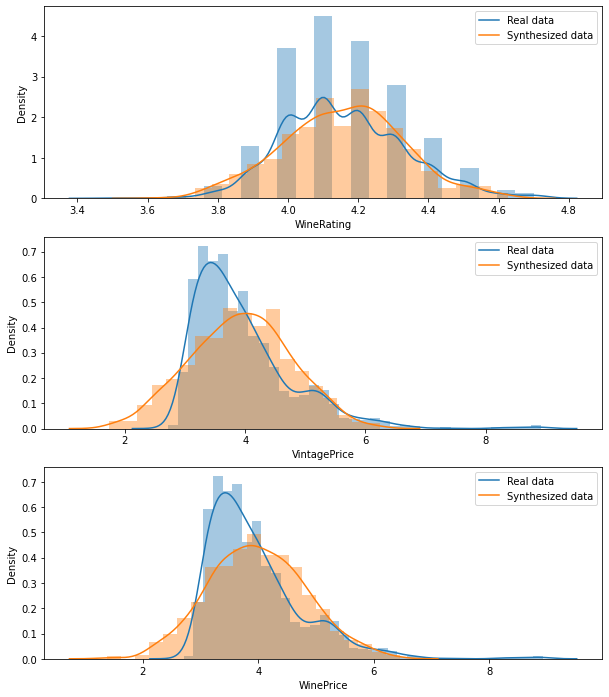

In [62]:
nodes_type = get_nodes_type(train)
# nodes_type = {
#     'Year': 'cont',
#     'VintageRating': 'cont',
#     'VintageRatingCount': 'disc',
#     'WineRatingCount': 'cont',
#     'VintageRatingPriceRatio': 'cont',
#     'WineRatingPriceRatio': 'cont',
#     'WineRating': 'cont',
#     'VintagePrice': 'cont',
#     'WinePrice': 'cont'
# }
print("Nodes type:\n", nodes_type)
print(len(nodes_type))
print()

nodes_sign = get_nodes_sign(train)
# nodes_sign = {
#     'Year': 'pos',
#     'VintageRating': 'pos',
#     'VintageRatingCount': 'pos',
#     'WineRatingCount': 'pos',
#     'VintageRatingPriceRatio': 'pos',
#     'WineRatingPriceRatio': 'pos',
#     'WineRating': 'pos',
#     'VintagePrice': 'pos',
#     'WinePrice': 'pos'
# }
# nodes_sign['VintageRatingCount'] = 'pos'
print("Nodes sign:\n", nodes_sign)
print(len(nodes_sign))
print()

bayes_manual = dict(
    {
        'V': [
            'Year',
            'VintageRating',
            'VintageRatingCount',
            'WineRatingCount',
            'VintageRatingPriceRatio',
            'WineRatingPriceRatio',
            'WineRating',
            'VintagePrice',
            'WinePrice'
        ],

        'E': [
            ['VintageRating', 'Year'],
            ['VintagePrice', 'Year'],
            ['WinePrice', 'Year'],

            ['WineRating', 'VintageRating'],
            ['VintagePrice', 'VintageRating'],
            ['WinePrice', 'VintageRating']
        ]
    }
)

print('Bayaes network:', bayes_manual)

draw_BN(bayes_manual, nodes_type, 'bayes_manual')

params = parameter_learning(train, nodes_type, bayes_manual, 'simple')

save_structure(bayes_manual, 'bayes_manual_structure')
skel = read_structure('bayes_manual_structure')

save_params(params, 'bayes_manual_params')
params = read_params('bayes_manual_params')

bayes_manual = HyBayesianNetwork(skel, params)

synth_df = generate_synthetics(bayes_manual, nodes_sign, 'simple', 800)

show_module(bayes_manual, nodes_sign, y_cols, train)


# Bayes Network using HC algorithm

In [63]:
module1_cols = ['Year', 'WineRatingCount', 'WineRatingPriceRatio']
module1, module1_d, node_type1, bn1, skel1, params1, hybn1 = getModule(
    module1_cols, 'module1', structStratMethod='HC', structAlgLearn='MI')

synth_df1 = generate_synthetics(hybn1, nodes_sign, 'simple', 800)

show_module(hybn1, nodes_sign, module1_cols, train)

print(calculate_acc(hybn1, test, module1_cols, 'simple')[0:2])


Duration (sec.): 0.22610092163085938
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
module
        Year  WineRatingCount  WineRatingPriceRatio
0     2001.0         6.626718              0.005827
1     2015.0         7.082549              0.006765
2     2013.0         6.784457              0.010268
3     2006.0         6.025866              0.027327
4     2007.0         6.118097              0.001351
...      ...              ...                   ...
4589  2018.0         6.297109              0.169996
4590  2010.0         5.267858              0.135685
4591  2015.0         4.510860              0.163265
4592  2017.0         5.799093              0.203373
4593  2018.0         6.723832              0.182755

[4583 rows x 3 columns]
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
mod

d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

# Bayes network using Evo algorithm

d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(


Best metric is 8.212100000000001
Generation num: 0
max_depth: 6, no improvements: 0
spent time: 0.2 min
Best metric is 8.0635
Generation num: 1
max_depth: 6, no improvements: 0
spent time: 0.4 min
Best metric is 8.0635
Generation num: 2
max_depth: 6, no improvements: 1
spent time: 0.5 min
Best metric is 8.0635
Generation num: 3
max_depth: 6, no improvements: 2
spent time: 0.6 min
Best metric is 8.0635
Generation num: 4
max_depth: 6, no improvements: 3
spent time: 0.7 min
Best metric is 7.9518
Generation num: 5
max_depth: 6, no improvements: 0
spent time: 0.8 min
Best metric is 7.9477
Generation num: 6
max_depth: 6, no improvements: 0
spent time: 0.9 min
Best metric is 7.9469
Generation num: 7
max_depth: 6, no improvements: 0
spent time: 1.3 min
Best metric is 7.9469
Generation num: 8
max_depth: 6, no improvements: 1
spent time: 1.9 min
Best metric is 7.9469
Generation num: 9
max_depth: 6, no improvements: 2
spent time: 2.2 min
Best metric is 7.946899999999999
Generation num: 10
max_dep

d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Unic-ITMO\Methods\proj_folder\methods-lab3\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

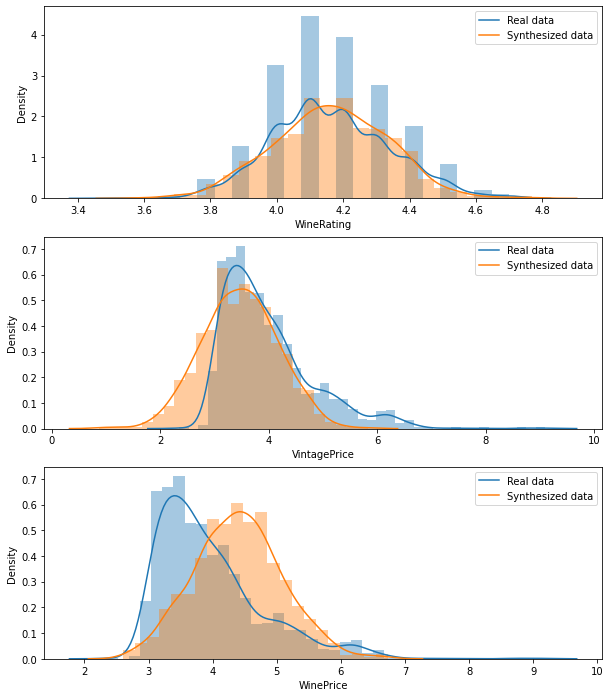

In [ ]:
bayes_evo = structure_learning(discrete, 'evo', nodes_type, 'MI')

print('Bayaes network:', bayes_evo)

draw_BN(bayes_evo, nodes_type, 'bayes_evo')

params = parameter_learning(train, nodes_type, bayes_evo, 'simple')
save_structure(bayes_evo, 'bayes_evo_structure')

skel = read_structure('bayes_evo_structure')
save_params(params, 'bayes_evo_params')
params = read_params('bayes_evo_params')

bayes_evo = HyBayesianNetwork(skel, params)

show_module(bayes_evo, nodes_sign, y_cols, train)
